In [4]:
import csv
import pandas as pd

input_file = "../data/raw/listings_detailed.csv"
output_file = "../data/processed/listings_fixed.csv"

rows = []

# Step 1: Read raw CSV safely
with open(input_file, "r", encoding="utf-8", errors="replace") as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

# Step 2: Detect the correct number of columns (based on header)
expected_cols = len(rows[0])
print(f"Expected columns: {expected_cols}")

# Step 3: Fix rows with wrong number of columns
fixed_rows = []
for i, row in enumerate(rows):
    if len(row) != expected_cols:
        print(f"Fixing row {i+1}: had {len(row)} columns")
        if len(row) < expected_cols:
            # Pad missing columns
            row += [""] * (expected_cols - len(row))
        else:
            # Merge extra columns into the last one
            row = row[:expected_cols-1] + [",".join(row[expected_cols-1:])]
    fixed_rows.append(row)

# Step 4: Save fixed CSV
with open(output_file, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerows(fixed_rows)

# Step 5: Load into pandas
data = pd.read_csv(output_file)
print("DataFrame shape:", data.shape)


Expected columns: 75
DataFrame shape: (42931, 75)


C:\Users\USER\AppData\Local\Temp\ipykernel_22036\1952502628.py:38: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


In [5]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,...,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,...,5.00,5.00,5.00,NaN,t,7,0,7,0,5.17
4,49248255,https://www.airbnb.com/rooms/49248255,20230306014634,2023-03-06,city scrape,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,https://a0.muscache.com/pictures/e8e13cf7-44e9...,397288055,...,4.88,4.72,4.64,NaN,f,1,1,0,0,1.11


In [7]:
data.isna().sum().reset_index()

,index,0
0,id,0
1,listing_url,0
2,scrape_id,0
3,last_scraped,0
4,source,0
...,...,...
70,calculated_host_listings_count,0
71,calculated_host_listings_count_entire_homes,0
72,calculated_host_listings_count_private_rooms,0
73,calculated_host_listings_count_shared_rooms,0


In [8]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
data.isna().sum().to_csv("../data/processed/missing_summary.csv")

In [9]:
data.price
data['price'] = data['price'].replace('[\$,]', '', regex = True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\USER\AppData\Local\Temp\ipykernel_22036\4287303707.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]', '', regex = True).astype(float)


In [10]:
data.price

0          143.0
1           30.0
2          157.0
3           89.0
4          125.0
5           63.0
6           82.0
7          118.0
8           49.0
9          115.0
10         975.0
11         179.0
12         172.0
13          68.0
14         100.0
15         380.0
16         175.0
17          60.0
18         301.0
19         109.0
20          41.0
21         105.0
22          40.0
23          80.0
24          90.0
25          60.0
26          85.0
27          99.0
28         216.0
29         150.0
30         280.0
31         143.0
32         156.0
33         152.0
34         128.0
35          55.0
36         225.0
37          50.0
38          70.0
39          45.0
40         188.0
41          28.0
42          46.0
43         175.0
44          56.0
45          55.0
46         101.0
47         215.0
48         289.0
49         380.0
50          50.0
51          99.0
52         199.0
53         151.0
54          35.0
55          26.0
56         109.0
57         133.0
58          89

In [11]:
Q1 = data["price"].quantile(0.25)   
Q3 = data["price"].quantile(0.75)   
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["price"] < lower_bound) | (data["price"] > upper_bound)]
print("Outliers found:", len(outliers))



Outliers found: 3293


In [12]:
import numpy as np

data["price_capped"] = data["price"].clip(lower=lower_bound, upper=upper_bound)

import numpy as np
data["price_log"] = np.log1p(data["price_capped"])

In [13]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_capped,price_log
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,https://www.airbnb.com/users/show/495455523,Michael,2023-01-10,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/773ed...,https://a0.muscache.com/im/pictures/user/773ed...,Canarsie,1.0,1.0,"['email', 'phone']",t,f,NaN,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,NaN,1 bath,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",143.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN,143.0,4.969813
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,https://www.airbnb.com/users/show/488760226,Eric,2022-11-22,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/87e00...,https://a0.muscache.com/im/pictures/user/87e00...,Canarsie,2.0,5.0,"['email', 'phone']",t,t,NaN,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",30.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,15,19,38,41,2023-03-06,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29,30.0,3.433987
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,https://www.airbnb.com/users/show/461263600,Tommaso,2022-05-27,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Tottenville,1.0,1.0,"['email', 'phone']",f,f,NaN,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",157.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN,157.0,5.062595
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,https://www.airbnb.com/users/show/47569

In [16]:
drop_cols = ['id','listing_url','scrape_id','name','description',
             'picture_url','license',
             'host_url','host_thumbnail_url','host_picture_url']

data = data.drop(columns=drop_cols, errors='ignore')

In [17]:
data.shape

(42931, 67)

In [18]:
num_cols = data.select_dtypes(include=['float64','int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna("Unknown")


In [20]:
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna("Unknown")


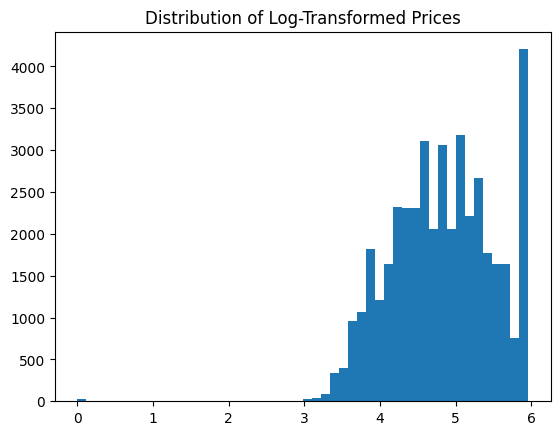

In [21]:
import matplotlib.pyplot as plt
plt.hist(data["price_log"], bins=50)
plt.title("Distribution of Log-Transformed Prices")
plt.show()
